In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv


In [2]:
train = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv')
train.head()
#train = train.drop([list(train['Weekly_Sales'].sort_values().head(5).index)])
train = train[train['Weekly_Sales'] > -1100]

In [3]:
train['Weekly_Sales'].sort_values().head(5).index

Int64Index([16297, 16295, 16291, 24830, 35561], dtype='int64')

In [4]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
test = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv')
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421565 entries, 0 to 421569
Data columns (total 5 columns):
Store           421565 non-null int64
Dept            421565 non-null int64
Date            421565 non-null object
Weekly_Sales    421565 non-null float64
IsHoliday       421565 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 16.5+ MB


In [7]:
sample = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv')
sample.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [8]:
y = train['Weekly_Sales']
y

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421565, dtype: float64

In [9]:
train['Date'] = train['Date'].astype('datetime64')
test['Date']= test['Date'].astype('datetime64')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421565 entries, 0 to 421569
Data columns (total 5 columns):
Store           421565 non-null int64
Dept            421565 non-null int64
Date            421565 non-null datetime64[ns]
Weekly_Sales    421565 non-null float64
IsHoliday       421565 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 16.5 MB


In [11]:
train['year'] = train['Date'].dt.year
test['year'] = test['Date'].dt.year

In [12]:
train2 = train[train['Weekly_Sales'] <50000]

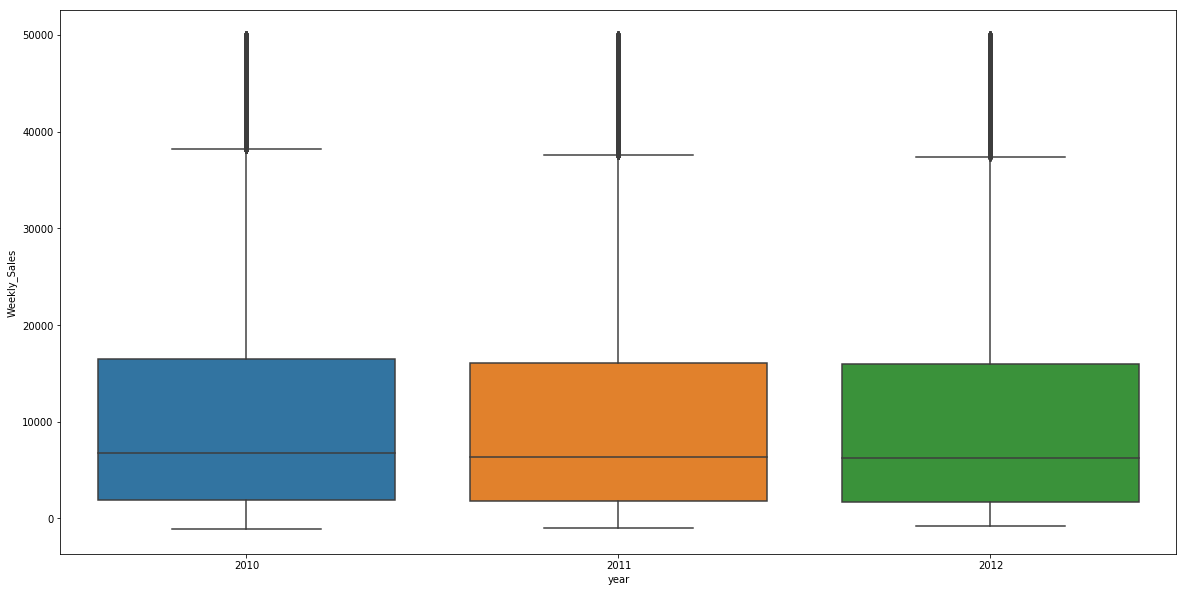

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
a,b = plt.subplots(1,1 , figsize = (20,10))
sns.boxplot(train2['year'], train2['Weekly_Sales'])

In [14]:
train['date'] = train['Date'].dt.date
test['date'] = test['Date'].dt.date

In [15]:
train2 = train[train['Weekly_Sales']<50000]

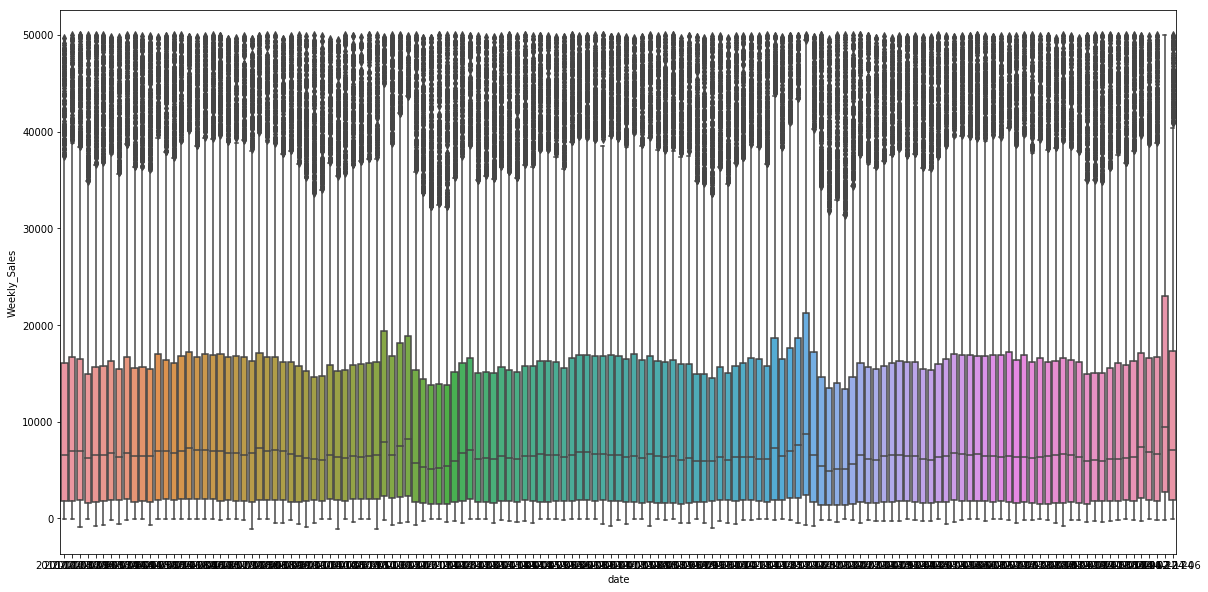

In [16]:
a,b = plt.subplots(1,1, figsize =(20,10))
sns.boxplot(train2['date'], train2['Weekly_Sales'])

In [17]:
train['week'] = train['Date'].dt.week
test['week'] = test['Date'].dt.week

In [18]:
train2 = train[train['Weekly_Sales']<50000]

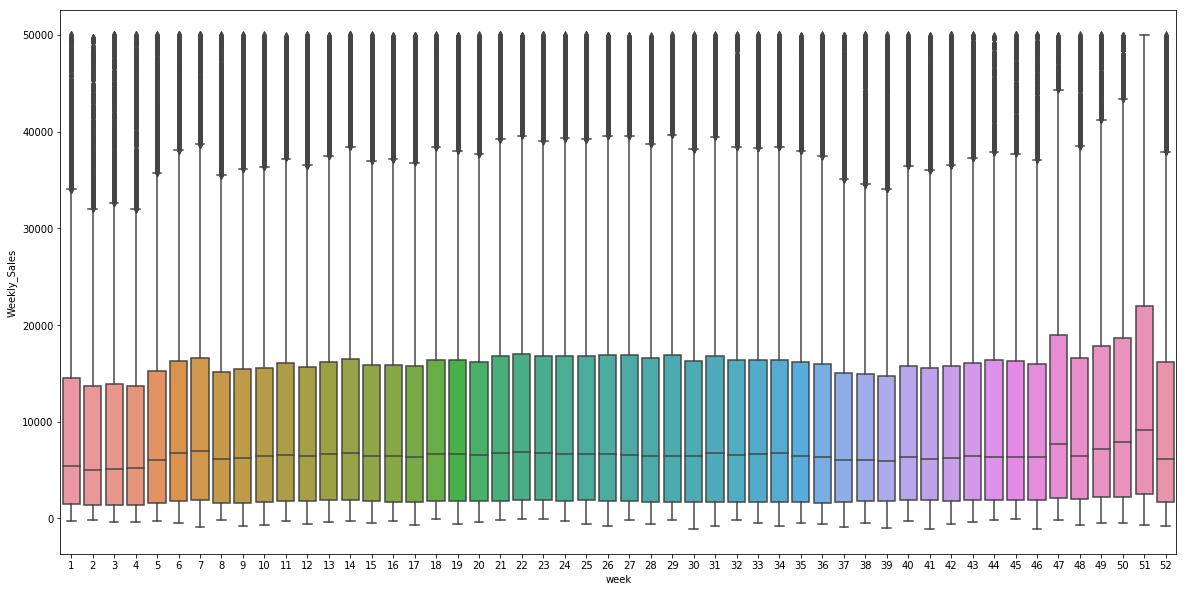

In [19]:
a,b = plt.subplots(1,1, figsize =(20,10))
sns.boxplot(train2['week'], train2['Weekly_Sales'])

In [20]:
store = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv')
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [21]:
train = pd.merge(train, store, on = 'Store', how = 'left')
test= pd.merge(test, store, on = "Store", how = "left")

In [22]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,year,date,week,Type,Size
0,1,1,2010-02-05,24924.50,False,2010,2010-02-05,5,A,151315
1,1,1,2010-02-12,46039.49,True,2010,2010-02-12,6,A,151315
2,1,1,2010-02-19,41595.55,False,2010,2010-02-19,7,A,151315
3,1,1,2010-02-26,19403.54,False,2010,2010-02-26,8,A,151315
4,1,1,2010-03-05,21827.90,False,2010,2010-03-05,9,A,151315


In [23]:
test.head()

,Store,Dept,Date,IsHoliday,year,date,week,Type,Size
0,1,1,2012-11-02,False,2012,2012-11-02,44,A,151315
1,1,1,2012-11-09,False,2012,2012-11-09,45,A,151315
2,1,1,2012-11-16,False,2012,2012-11-16,46,A,151315
3,1,1,2012-11-23,True,2012,2012-11-23,47,A,151315
4,1,1,2012-11-30,False,2012,2012-11-30,48,A,151315


In [24]:
train['Type'].value_counts()

A    215476
B    163492
C     42597
Name: Type, dtype: int64

In [25]:
train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
year                     int64
date                    object
week                     int64
Type                    object
Size                     int64
dtype: object

In [26]:
train['Type'] = train['Type'].replace({"A":1, "B":2, "C":3})
test['Type'] = test['Type'].replace({"A":1, "B":2, "C":3})

In [27]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,year,date,week,Type,Size
0,1,1,2010-02-05,24924.50,False,2010,2010-02-05,5,1,151315
1,1,1,2010-02-12,46039.49,True,2010,2010-02-12,6,1,151315
2,1,1,2010-02-19,41595.55,False,2010,2010-02-19,7,1,151315
3,1,1,2010-02-26,19403.54,False,2010,2010-02-26,8,1,151315
4,1,1,2010-03-05,21827.90,False,2010,2010-03-05,9,1,151315


In [28]:
train['Type']

0         1
1         1
2         1
3         1
4         1
         ..
421560    2
421561    2
421562    2
421563    2
421564    2
Name: Type, Length: 421565, dtype: int64

In [29]:
train2 = train[train['Weekly_Sales'] <10000]

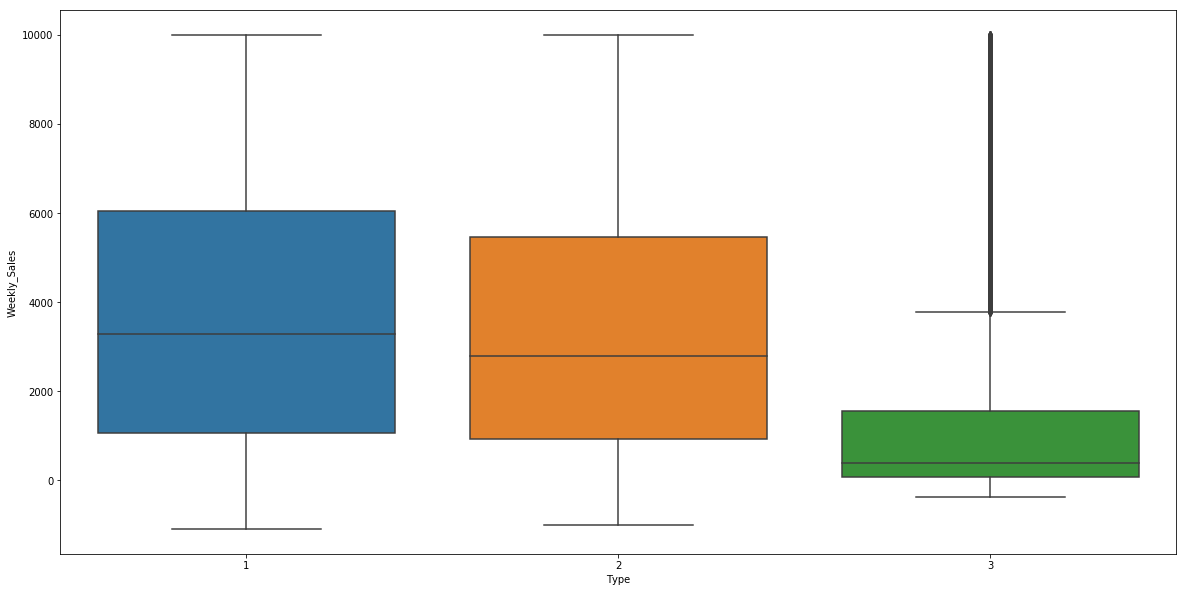

In [30]:
a,b = plt.subplots(1,1, figsize = (20,10))
sns.boxplot(train2['Type'], train2['Weekly_Sales'])

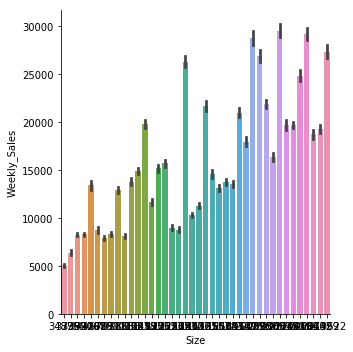

In [31]:
sns.catplot(x= "Size", y= 'Weekly_Sales',kind= "bar", data= train )

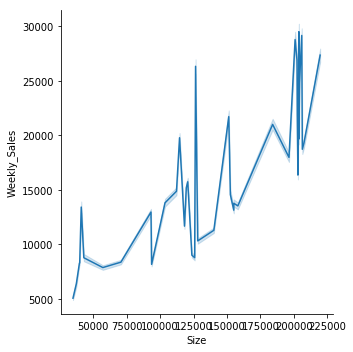

In [32]:

sns.relplot(x = "Size", y = "Weekly_Sales", kind = "line", data= train)

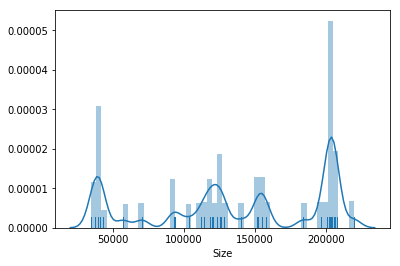

In [33]:
sns.distplot(train['Size'], kde=True, rug=True)

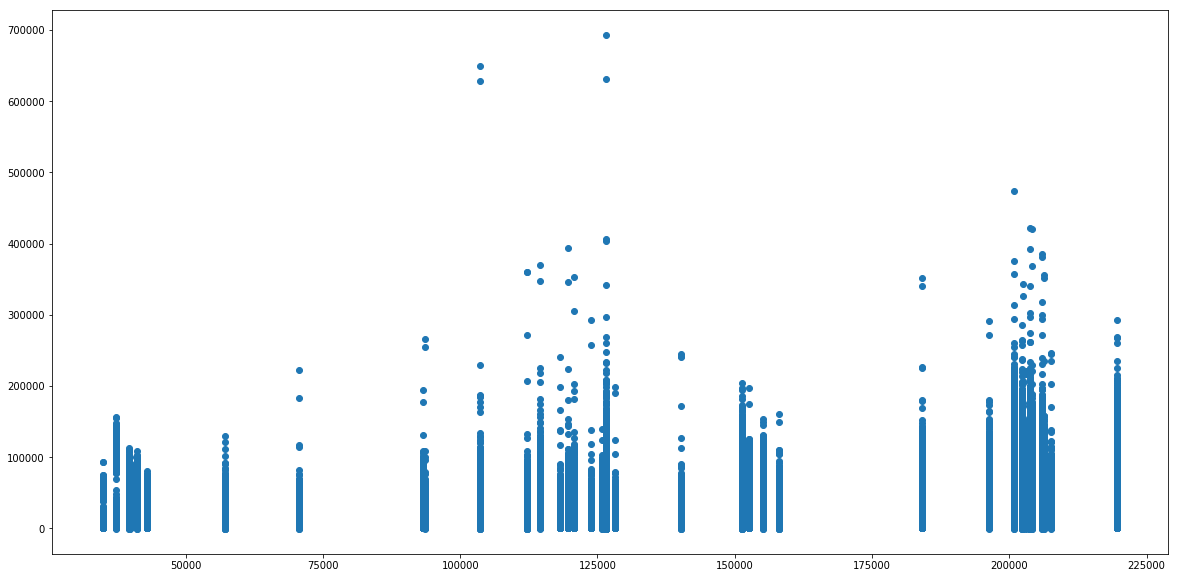

In [34]:
a,b = plt.subplots(1,1, figsize = (20,10))
plt.scatter(train['Size'], train['Weekly_Sales']) #산점도

(array([ 73341.,  19204.,      0.,  28846.,  78021.,  19386.,  50234.,
             0.,  30006., 122527.]),
 array([ 34875. ,  53349.7,  71824.4,  90299.1, 108773.8, 127248.5,
        145723.2, 164197.9, 182672.6, 201147.3, 219622. ]),
 <a list of 10 Patch objects>)

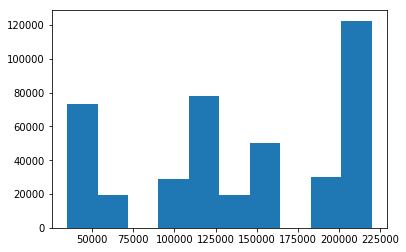

In [35]:
plt.hist(train['Size']) #y..?

In [36]:
train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
year                     int64
date                    object
week                     int64
Type                     int64
Size                     int64
dtype: object

In [37]:
x_train = train.drop(['Weekly_Sales', 'Date', 'date'],1)
x_train.head()

,Store,Dept,IsHoliday,year,week,Type,Size
0,1,1,False,2010,5,1,151315
1,1,1,True,2010,6,1,151315
2,1,1,False,2010,7,1,151315
3,1,1,False,2010,8,1,151315
4,1,1,False,2010,9,1,151315


In [38]:
x_test = test.drop(['Date','date'],1)
x_test.head()

,Store,Dept,IsHoliday,year,week,Type,Size
0,1,1,False,2012,44,1,151315
1,1,1,False,2012,45,1,151315
2,1,1,False,2012,46,1,151315
3,1,1,True,2012,47,1,151315
4,1,1,False,2012,48,1,151315


In [39]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421565 entries, 0 to 421564
Data columns (total 7 columns):
Store        421565 non-null int64
Dept         421565 non-null int64
IsHoliday    421565 non-null bool
year         421565 non-null int64
week         421565 non-null int64
Type         421565 non-null int64
Size         421565 non-null int64
dtypes: bool(1), int64(6)
memory usage: 42.9 MB


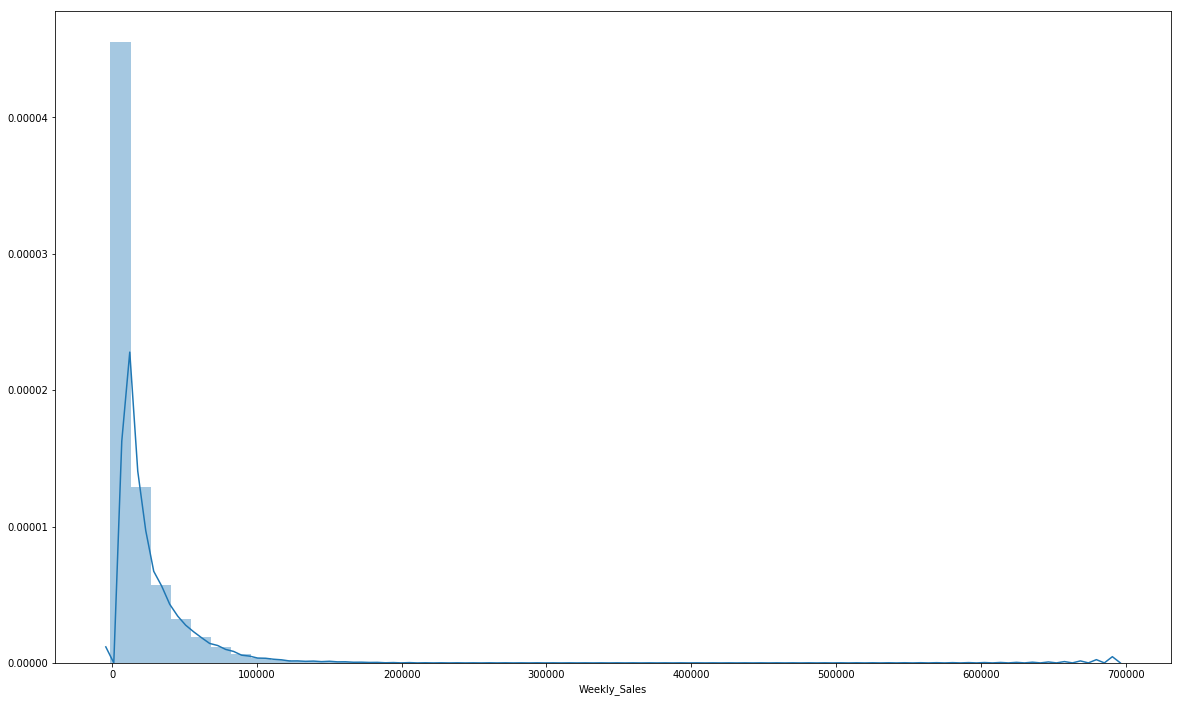

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
a,b = plt.subplots(1,1, figsize=(20,12) )
sns.distplot(y)

In [41]:
y.min()

-1098.0

In [42]:
y.mean()

15981.480128877123

In [43]:
y.sort_values().head(5).index

Int64Index([16297, 16295, 16291, 24830, 35561], dtype='int64')

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rf = RandomForestRegressor(n_jobs = -1, n_estimators = 100)
rf.fit(x_train, np.log(y+1100))
result = rf.predict(x_test)


In [46]:
#from xgboost import XGBRegressor 

In [47]:
#xgb = XGBRegressor(n_estimators = 100, n_thread =4, max_depth =10 )
#xgb.fit(x_train,y)
#result = xgb.predict(x_test)

In [48]:
result

array([10.33092861,  9.89877611,  9.91350534, ...,  7.49658764,
        7.53485009,  7.4766433 ])

In [49]:
sample['Weekly_Sales'] = np.exp(result)-1100
sample.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,29566.575826
1,1_1_2012-11-09,18805.992807
2,1_1_2012-11-16,19101.362765
3,1_1_2012-11-23,20451.152892
4,1_1_2012-11-30,24091.273752


In [50]:
sample.to_csv('submission.csv', index =False)